In [ ]:
import pandas as pd
import zipfile

with zipfile.ZipFile("CASE PS EQUAL 2026.zip", "r") as zip_ref:
    zip_ref.extractall()
!ls


fato_vendas = pd.read_excel("fato_vendas.xlsx")
dim_produtos = pd.read_excel("dim_produtos.xlsx")
dim_vendedor = pd.read_excel("dim_vendedor.xlsx")
dim_familia = pd.read_excel("dim_familia_produtos.xlsx")

fato_vendas.head()


'CASE PS 26.1 Estágio.pdf'   dim_produtos.xlsx	 sample_data
'CASE PS EQUAL 2026.zip'     dim_vendedor.xlsx
 dim_familia_produtos.xlsx   fato_vendas.xlsx


,codigo_contrato,data_venda,codigo_produto,filial_venda,quantidade,valor_monetario_total,valor_desconto,codigo_vendedor,codigo_cliente
0,3359882,2025-01-06,2359417,16,1,188.4,0.0,585,330626.0
1,3370767,2025-01-03,560200,10,2,2.2,0.0,618,39300.0
2,3370767,2025-01-03,1127900,10,2,4.7,0.0,618,39300.0
3,3370767,2025-01-03,1622300,10,1,211.6,0.0,618,39300.0
4,3370767,2025-01-03,2896605,10,1,87.0,0.0,618,39300.0


In [ ]:
fato_vendas.head()

,codigo_contrato,data_venda,codigo_produto,filial_venda,quantidade,valor_monetario_total,valor_desconto,codigo_vendedor,codigo_cliente
0,3359882,2025-01-06,2359417,16,1,188.4,0.0,585,330626.0
1,3370767,2025-01-03,560200,10,2,2.2,0.0,618,39300.0
2,3370767,2025-01-03,1127900,10,2,4.7,0.0,618,39300.0
3,3370767,2025-01-03,1622300,10,1,211.6,0.0,618,39300.0
4,3370767,2025-01-03,2896605,10,1,87.0,0.0,618,39300.0


In [ ]:
fato_vendas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161902 entries, 0 to 161901
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   codigo_contrato        161902 non-null  object        
 1   data_venda             161902 non-null  datetime64[ns]
 2   codigo_produto         161902 non-null  int64         
 3   filial_venda           161902 non-null  int64         
 4   quantidade             161902 non-null  int64         
 5   valor_monetario_total  161902 non-null  float64       
 6   valor_desconto         161902 non-null  float64       
 7   codigo_vendedor        161902 non-null  int64         
 8   codigo_cliente         161876 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 11.1+ MB


In [ ]:
import pandas as pd
from itertools import combinations


In [ ]:
df = fato_vendas.merge(
    dim_produtos,
    on="id_produto",
    how="left"
).merge(
    dim_familia,
    on="id_familia_produto",
    how="left"
)

df = df[["id_cliente", "nome_familia_produto"]]


KeyError: 'id_produto'

In [ ]:
def mostrar_schema(df, nome):
    print(f"\n=== {nome} ===")
    display(pd.DataFrame({
        "coluna": df.columns,
        "tipo": df.dtypes.astype(str)
    }))

mostrar_schema(fato_vendas, "fato_vendas")
mostrar_schema(dim_produtos, "dim_produtos")
mostrar_schema(dim_vendedor, "dim_vendedor")
mostrar_schema(dim_familia, "dim_familia_produtos")



=== fato_vendas ===


,coluna,tipo
codigo_contrato,codigo_contrato,object
data_venda,data_venda,datetime64[ns]
codigo_produto,codigo_produto,int64
filial_venda,filial_venda,int64
quantidade,quantidade,int64
valor_monetario_total,valor_monetario_total,float64
valor_desconto,valor_desconto,float64
codigo_vendedor,codigo_vendedor,int64
codigo_cliente,codigo_cliente,float64



=== dim_produtos ===


,coluna,tipo
codigo_produto,codigo_produto,int64
descricaoproduto,descricaoproduto,object
codigo_familia,codigo_familia,object
preco_venda_unitario,preco_venda_unitario,float64
custo_produto_unitario,custo_produto_unitario,float64
_categoria_grupo,_categoria_grupo,object



=== dim_vendedor ===


,coluna,tipo
codigo_vendedor,codigo_vendedor,int64
nome_vendedor,nome_vendedor,object



=== dim_familia_produtos ===


,coluna,tipo
codigo_familia,codigo_familia,object
descricaofamilia,descricaofamilia,object


In [ ]:
import pandas as pd


In [ ]:
df_base = (
    fato_vendas
    .merge(
        dim_produtos,
        on="codigo_produto",
        how="left"
    )
    .merge(
        dim_familia,
        on="codigo_familia",
        how="left"
    )
)


In [ ]:
df_base = df_base[["codigo_cliente", "descricaofamilia"]]



In [ ]:
df_base.head()


,codigo_cliente,descricaofamilia
0,330626.0,Utensils
1,39300.0,Books
2,39300.0,Books
3,39300.0,Collectibles
4,39300.0,Office Supplies


In [ ]:
df_cf = df_base.drop_duplicates()


In [ ]:
df_cf.head()


,codigo_cliente,descricaofamilia
0,330626.0,Utensils
1,39300.0,Books
3,39300.0,Collectibles
4,39300.0,Office Supplies
5,39300.0,Outdoor Gear


In [ ]:
len(df_base), len(df_cf)


(161902, 97859)

In [ ]:
familias_por_cliente = (
    df_cf
    .groupby("codigo_cliente")["descricaofamilia"]
    .apply(list)
)


In [ ]:
familias_por_cliente.head()


,descricaofamilia
codigo_cliente,
12.0,"[Mirrors, Office Supplies, Showers & Tubs]"
42.0,[Collectibles]
63.0,[Tile Flooring]
70.0,[Sculpting Supplies]
107.0,"[Lighting, Mirrors, Bakeware]"


In [ ]:
from itertools import combinations

pares = []

for familias in familias_por_cliente:
    if len(familias) > 1:
        pares.extend(combinations(sorted(familias), 2))



In [ ]:
df_pares = pd.DataFrame(pares, columns=["familia_X", "familia_Y"])


In [ ]:
df_pares.head()


,familia_X,familia_Y
0,Mirrors,Office Supplies
1,Mirrors,Showers & Tubs
2,Office Supplies,Showers & Tubs
3,Bakeware,Lighting
4,Bakeware,Mirrors


In [ ]:
afinidade = (
    df_pares
    .value_counts()
    .reset_index(name="qtd_clientes")
    .sort_values("qtd_clientes", ascending=False)
)


In [ ]:
afinidade.head()


,familia_X,familia_Y,qtd_clientes
0,Books,Outdoor Plants,1595
1,Books,Lamps,1244
2,Books,Mirrors,1087
3,Clothing,Mirrors,1035
4,Books,Clothing,1035


In [ ]:
total_por_familia = (
    df_cf
    .value_counts("descricaofamilia")
    .to_dict()
)

afinidade["confianca_X_para_Y"] = (
    afinidade["qtd_clientes"] /
    afinidade["familia_X"].map(total_por_familia)
)


In [ ]:
afinidade.head()


,familia_X,familia_Y,qtd_clientes,confianca_X_para_Y
0,Books,Outdoor Plants,1595,0.327583
1,Books,Lamps,1244,0.255494
2,Books,Mirrors,1087,0.223249
3,Clothing,Mirrors,1035,0.240362
4,Books,Clothing,1035,0.212569


In [ ]:
matriz_afinidade = afinidade.pivot(
    index="familia_X",
    columns="familia_Y",
    values="qtd_clientes"
).fillna(0)


In [ ]:
matriz_afinidade.head()


familia_Y,Bakeware,Bathroom Fixtures,Bedding,Bedroom Furniture,Books,Carpet & Rugs,Ceiling Lights,Clothing,Collectibles,Comic Books,...,Sports Equipment,Sports Memorabilia,Stamps & Coins,Streaming Services,Tile Flooring,Toilets,Toys,Utensils,Video Games,Wall Decor
familia_X,,,,,,,,,,,,,,,,,,,,,
Arts & Crafts,15.0,11.0,4.0,2.0,9.0,4.0,9.0,8.0,6.0,1.0,...,4.0,1.0,11.0,4.0,1.0,14.0,13.0,4.0,1.0,1.0
Bakeware,0.0,167.0,19.0,95.0,493.0,25.0,62.0,376.0,152.0,21.0,...,25.0,18.0,76.0,6.0,27.0,101.0,116.0,35.0,32.0,34.0
Bathroom Fixtures,0.0,0.0,9.0,21.0,121.0,7.0,32.0,64.0,57.0,4.0,...,10.0,6.0,45.0,2.0,5.0,52.0,73.0,11.0,11.0,15.0
Bedding,0.0,0.0,0.0,10.0,8.0,6.0,12.0,10.0,6.0,3.0,...,17.0,3.0,13.0,7.0,3.0,30.0,15.0,7.0,5.0,4.0
Bedroom Furniture,0.0,0.0,0.0,0.0,210.0,20.0,23.0,202.0,54.0,14.0,...,68.0,11.0,16.0,4.0,28.0,167.0,46.0,27.0,20.0,26.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


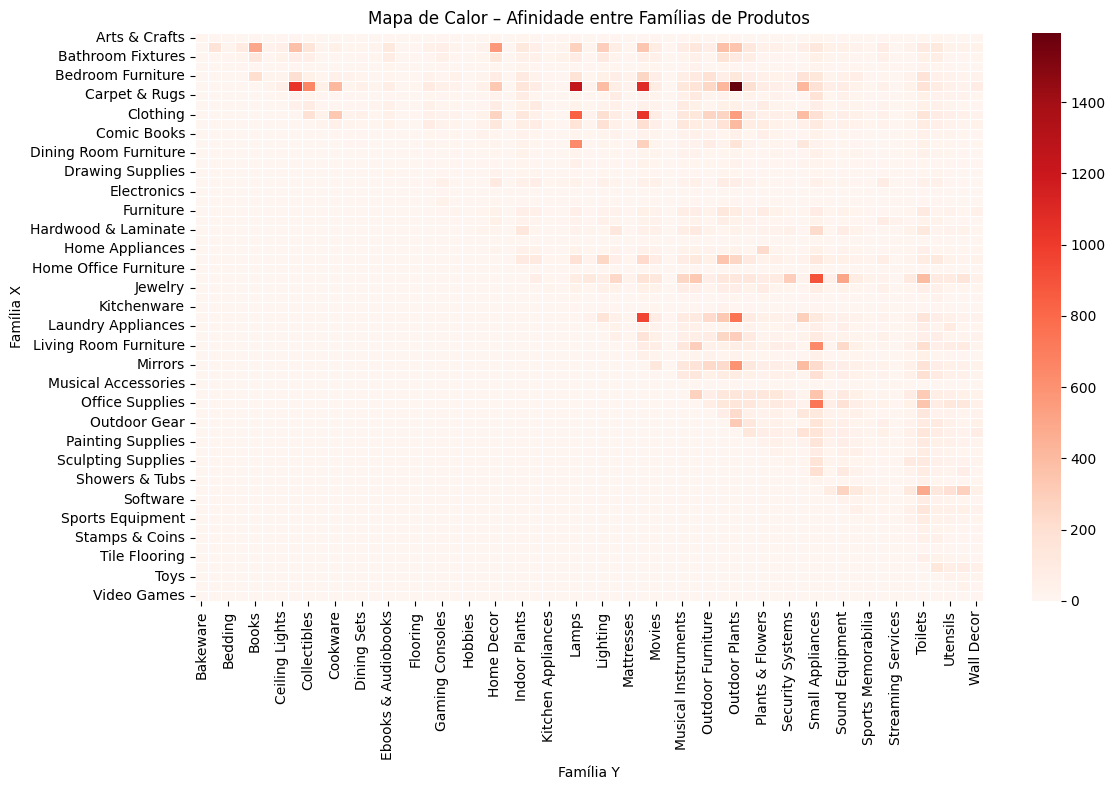

In [ ]:
plt.figure(figsize=(12, 8))

sns.heatmap(
    matriz_afinidade,
    cmap="Reds",
    linewidths=0.5
)

plt.title("Mapa de Calor – Afinidade entre Famílias de Produtos")
plt.xlabel("Família Y")
plt.ylabel("Família X")
plt.tight_layout()
plt.show()


In [ ]:
dir()


['In',
 'Out',
 '_',
 '_16',
 '_18',
 '_19',
 '_21',
 '_24',
 '_26',
 '_28',
 '_30',
 '_6',
 '_7',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'afinidade',
 'combinations',
 'df_base',
 'df_cf',
 'df_pares',
 'dim_familia',
 'dim_produtos',
 'dim_vendedor',
 'exit',
 'familias',
 'familias_por_cliente',
 'fato_vendas',
 'get_ipython',
 'matriz_afinidade',
 'mostrar_schema',
 'pares',
 'pd',
 'plt',
 'quit',
 'sns',
 'total_por_familia',
 'zip_ref',
 'zipfile']

In [ ]:
matriz_afinidade_reset = matriz_afinidade.reset_index()
matriz_afinidade_reset.columns



Index(['familia_X', 'Bakeware', 'Bathroom Fixtures', 'Bedding',
       'Bedroom Furniture', 'Books', 'Carpet & Rugs', 'Ceiling Lights',
       'Clothing', 'Collectibles', 'Comic Books', 'Cookware',
       'Dining Room Furniture', 'Dining Sets', 'Drawing Supplies',
       'Ebooks & Audiobooks', 'Electronics', 'Flooring', 'Furniture',
       'Gaming Consoles', 'Hardwood & Laminate', 'Hobbies', 'Home Appliances',
       'Home Decor', 'Home Office Furniture', 'Indoor Plants', 'Jewelry',
       'Kitchen Appliances', 'Kitchenware', 'Lamps', 'Laundry Appliances',
       'Lighting', 'Living Room Furniture', 'Mattresses', 'Mirrors', 'Movies',
       'Musical Accessories', 'Musical Instruments', 'Office Supplies',
       'Outdoor Furniture', 'Outdoor Gear', 'Outdoor Plants',
       'Painting Supplies', 'Plants & Flowers', 'Sculpting Supplies',
       'Security Systems', 'Showers & Tubs', 'Small Appliances', 'Software',
       'Sound Equipment', 'Sports Equipment', 'Sports Memorabilia',
       'S

In [ ]:
df_powerbi = (
    matriz_afinidade
        .reset_index()
        .melt(
            id_vars="familia_X",
            var_name="familia_relacionada",
            value_name="clientes_em_comum"
        )
)


In [ ]:
df_powerbi.head()


,familia_X,familia_relacionada,clientes_em_comum
0,Arts & Crafts,Bakeware,15.0
1,Bakeware,Bakeware,0.0
2,Bathroom Fixtures,Bakeware,0.0
3,Bedding,Bakeware,0.0
4,Bedroom Furniture,Bakeware,0.0


In [ ]:
df_powerbi_limpo = df_powerbi[
    (df_powerbi["familia_X"] != df_powerbi["familia_relacionada"]) &
    (df_powerbi["clientes_em_comum"] > 0)
]


In [ ]:
df_powerbi_limpo.head()


,familia_X,familia_relacionada,clientes_em_comum
0,Arts & Crafts,Bakeware,15.0
59,Arts & Crafts,Bathroom Fixtures,11.0
60,Bakeware,Bathroom Fixtures,167.0
118,Arts & Crafts,Bedding,4.0
119,Bakeware,Bedding,19.0


In [ ]:
df_powerbi_limpo.to_csv(
    "afinidade_familias_powerbi.csv",
    index=False,
    encoding="utf-8-sig"
)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
